In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set_theme(font_scale=.75, style="dark")
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
import pickle
import streamlit as st
import cv2
from PIL import Image
import shutil







In [5]:
mnist = fetch_openml('mnist_784' ,version = 1 , cache = True , as_frame= False)
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
X ,y = mnist.data , mnist.target

## EDA

In [6]:
print(f"Feature shape:{X.shape}")
print(f"Target shape:{y.shape}")

Feature shape:(70000, 784)
Target shape:(70000,)


In [7]:
print(f"Unique target labels:{np.unique(y)}")

Unique target labels:['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [8]:
print(X[:5])
print(y[:5])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['5' '0' '4' '1' '9']


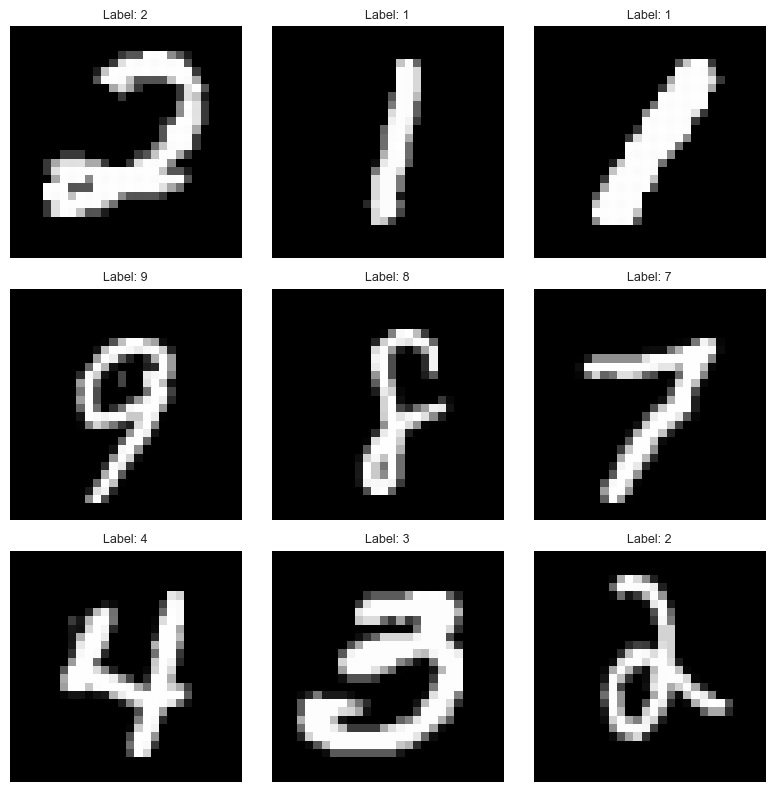

In [9]:
# Function to plot sample images
def plot_samples(X, y, n=9):
    plt.figure(figsize=(8, 8))
    for i in range(n):
        # Pick a random index
        index = np.random.randint(0, X.shape[0])
        
        # Reshape the 784-pixel row into a 28x28 image
        image = X[index].reshape(28, 28)
        
        # Plot the image
        plt.subplot(3, 3, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {y[index]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Plot 9 random samples
plot_samples(X, y)


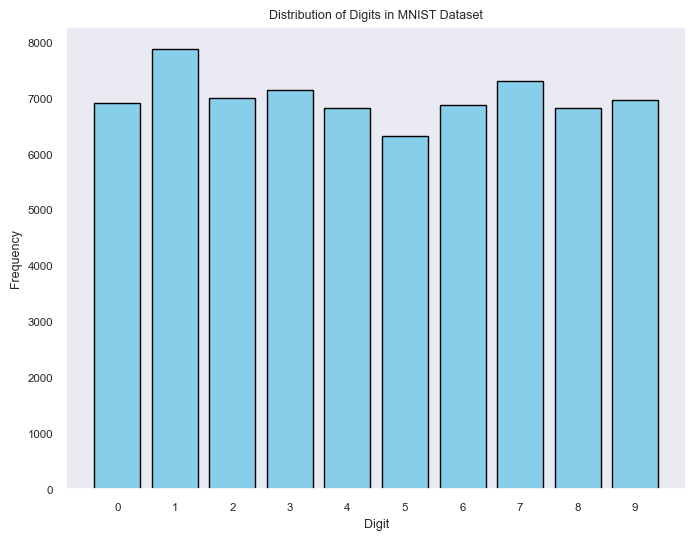

In [10]:
# Check distribution of labels
plt.figure(figsize=(8, 6))
plt.hist(y.astype(int), bins=np.arange(11) - 0.5, rwidth=0.8, color='skyblue', edgecolor='black')  
plt.title('Distribution of Digits in MNIST Dataset')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.xticks(ticks=range(10))
plt.show()



In [11]:
print(X.dtype)
print(y.dtype)

int64
object


In [12]:
print(f"Missing values in features: {(X == None).sum() + (X == '').sum()}")
print(f"Missing values in labels: {(y == None).sum() + (y == '').sum()}")


Missing values in features: 0
Missing values in labels: 0


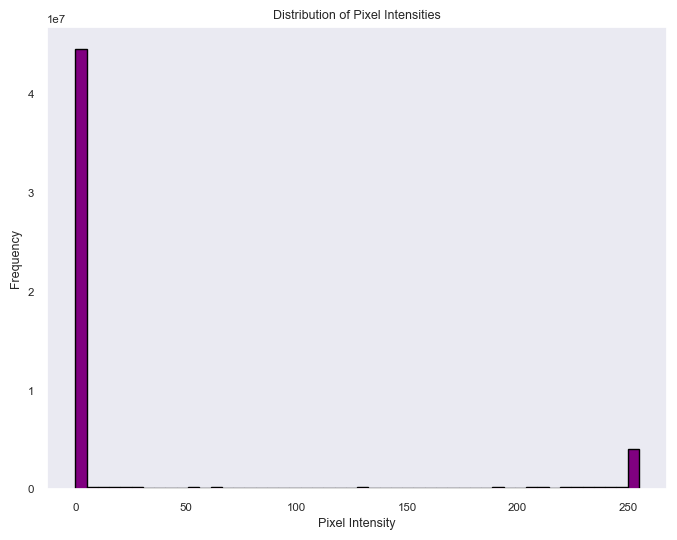

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(X.flatten(), bins=50, color='purple', edgecolor='black')  # Flatten directly
plt.title("Distribution of Pixel Intensities")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

## Preparing data

In [14]:
X_scaled = X / 255.0 

# Step 1: Initial Split (train-test split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Step 2: Further Split (train-validation split)
X_train_small, X_val, y_train_small, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

y_train_small = y_train_small.astype(int)
y_val = y_val.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int) 



## Training the  models

In [15]:
# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', RandomForestClassifier(random_state=42))
])

# Decision Tree Pipeline
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', DecisionTreeClassifier(random_state=42))
])

# XGBoost Pipeline
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Fitting the models on the small training set
rf_pipeline.fit(X_train_small, y_train_small)
dt_pipeline.fit(X_train_small, y_train_small)
xgb_pipeline.fit(X_train_small, y_train_small)


c:\Users\alikh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:28:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='mlogloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

# Models evaluation on the validation set


Random Forest Performance:
Accuracy: 0.9663
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1126
           1       0.99      0.99      0.99      1274
           2       0.97      0.97      0.97      1106
           3       0.96      0.96      0.96      1144
           4       0.97      0.97      0.97      1104
           5       0.97      0.96      0.97      1039
           6       0.97      0.97      0.97      1096
           7       0.97      0.97      0.97      1149
           8       0.96      0.95      0.95      1090
           9       0.94      0.94      0.94      1072

    accuracy                           0.97     11200
   macro avg       0.97      0.97      0.97     11200
weighted avg       0.97      0.97      0.97     11200



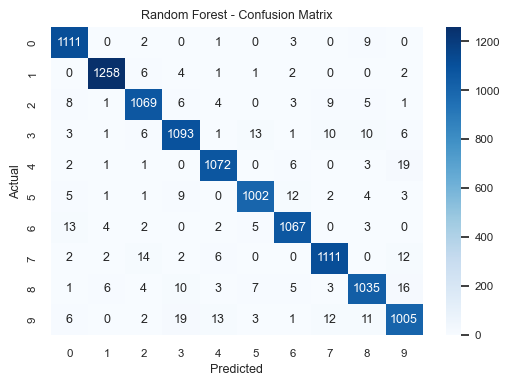

Decision Tree Performance:
Accuracy: 0.8640
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      1126
           1       0.94      0.96      0.95      1274
           2       0.86      0.84      0.85      1106
           3       0.83      0.84      0.83      1144
           4       0.86      0.85      0.86      1104
           5       0.81      0.82      0.81      1039
           6       0.90      0.88      0.89      1096
           7       0.90      0.90      0.90      1149
           8       0.80      0.79      0.79      1090
           9       0.81      0.83      0.82      1072

    accuracy                           0.86     11200
   macro avg       0.86      0.86      0.86     11200
weighted avg       0.86      0.86      0.86     11200



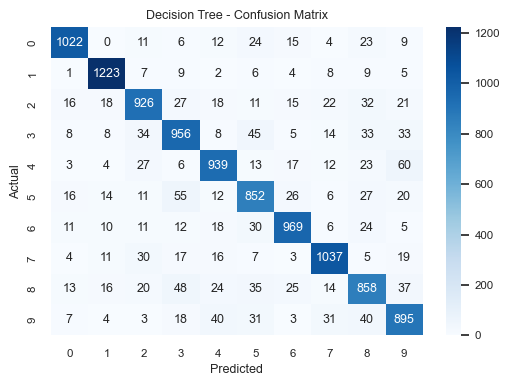

XGBoost Performance:
Accuracy: 0.9762
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1126
           1       0.99      0.99      0.99      1274
           2       0.97      0.97      0.97      1106
           3       0.98      0.97      0.97      1144
           4       0.98      0.98      0.98      1104
           5       0.98      0.97      0.98      1039
           6       0.98      0.98      0.98      1096
           7       0.98      0.98      0.98      1149
           8       0.96      0.97      0.97      1090
           9       0.96      0.96      0.96      1072

    accuracy                           0.98     11200
   macro avg       0.98      0.98      0.98     11200
weighted avg       0.98      0.98      0.98     11200



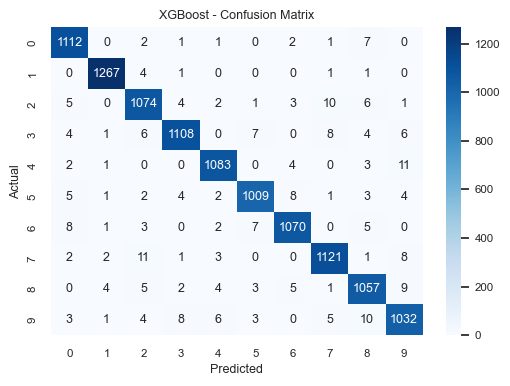


Best performing model: XGBoost with accuracy: 0.9762


In [16]:
# Function to evaluate models
def evaluate_model(model, X_val, y_val, model_name):
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    conf_mat = confusion_matrix(y_val, y_pred)
    report = classification_report(y_val, y_pred)

    print(f"{model_name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", report)

    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate all three models
evaluate_model(rf_pipeline, X_val, y_val, "Random Forest")
evaluate_model(dt_pipeline, X_val, y_val, "Decision Tree")
evaluate_model(xgb_pipeline, X_val, y_val, "XGBoost")

# store results for comparison
results = {
    "Random Forest": accuracy_score(y_val, rf_pipeline.predict(X_val)),
    "Decision Tree": accuracy_score(y_val, dt_pipeline.predict(X_val)),
    "XGBoost": accuracy_score(y_val, xgb_pipeline.predict(X_val))
}

# Compare model performance
best_model = max(results, key=results.get)
print(f"\nBest performing model: {best_model} with accuracy: {results[best_model]:.4f}")

# Hyperparameter tuning

In [ ]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 7, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}
# Create a new XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_grid,
    n_iter=20, 
    scoring='accuracy',
    cv=3, 
    verbose=2,

    random_state=42
)

# Fit on the smaller training set
random_search.fit(X_train_small, y_train_small)

# Best parameters
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

best_xgb = random_search.best_estimator_


In [19]:
best_params = random_search.best_params_
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Best Cross-Validation Score: 0.9671204938297779


Test Accuracy of Tuned XGBoost Model: 0.9726
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1343
           1       0.98      0.98      0.98      1600
           2       0.96      0.97      0.97      1380
           3       0.98      0.96      0.97      1433
           4       0.96      0.98      0.97      1295
           5       0.98      0.98      0.98      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.98      0.97      1503
           8       0.96      0.96      0.96      1357
           9       0.96      0.95      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



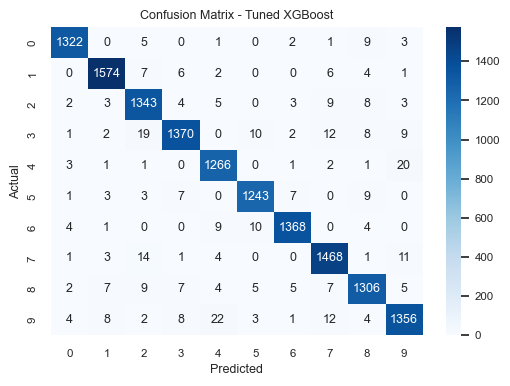

In [ ]:
# Train the tuned model on the full training set
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_train, y_train)

# Predict on the test set
y_test_pred = best_xgb.predict(X_test)

test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy of Tuned XGBoost Model: {test_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, y_test_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Tuned XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Saving the tuned model

In [22]:
with open("xgboost_digit_classifier.pkl", "wb") as model_file:
    pickle.dump(best_xgb, model_file)

print("Model saved successfully as xgboost_digit_classifier.pkl")

Model saved successfully as xgboost_digit_classifier.pkl


In [23]:
import os
print(os.getcwd())

c:\Users\alikh\Desktop


# Backup the model

In [ ]:
#i wanted to train this model with a modified dataset,i did not do it because i did not have the time 
shutil.copy("xgboost_digit_classifier.pkl", "xgboost_digit_classifier_v1.pkl")

print("Backup completed: xgboost_digit_classifier_v1.pkl")

Backup completed: xgboost_digit_classifier_v1.pkl
